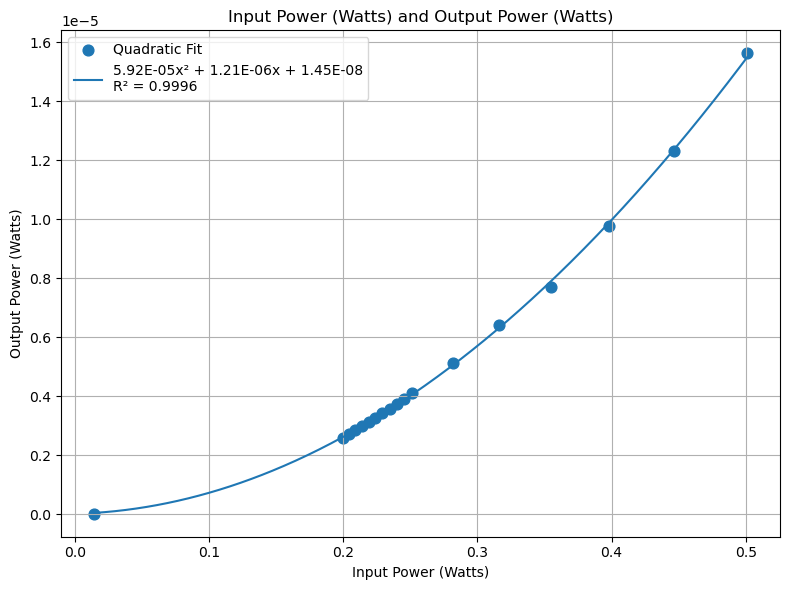

In [3]:
import numpy as np
import matplotlib.pyplot as plt

input_power = np.array([
    0.1995262315, 0.2041737945, 0.2089296131, 0.213796209,
    0.2187761624, 0.2238721139, 0.2290867653, 0.2344228815,
    0.2398832919, 0.2454708916, 0.2511886432, 0.2818382931,
    0.316227766, 0.3548133892, 0.3981071706, 0.4466835922,
    0.5011872336, 0.01412537545
])

output_power = np.array([
    0.000002591812865, 0.000002704093567, 0.000002839766082,
    0.000002984795322, 0.000003114619883, 0.000003260818713,
    0.000003428070175, 0.000003569590643, 0.000003739181287,
    0.000003914619883, 0.000004093567251, 0.000005139181287,
    0.000006426900585, 0.000007708217913, 0.000009769159741,
    0.00001232132964, 0.00001562696214, 0.00000001698984303
])

sorted_indices = np.argsort(input_power)
x = input_power[sorted_indices]
y = output_power[sorted_indices]

coeffs = np.polyfit(x, y, 2)
poly = np.poly1d(coeffs)
x_fit = np.linspace(min(x), max(x), 500)
y_fit = poly(x_fit)

y_pred = poly(x)
ss_res = np.sum((y - y_pred)**2)
ss_tot = np.sum((y - np.mean(y))**2)
r2 = 1 - (ss_res / ss_tot)

plt.figure(figsize=(8,6))

plt.scatter(x, y, s=60)
plt.plot(x_fit, y_fit)

plt.xlabel("Input Power (Watts)")
plt.ylabel("Output Power (Watts)")
plt.title("Input Power (Watts) and Output Power (Watts)")
plt.grid(True)

eq_text = f"{coeffs[0]:.2E}x² + {coeffs[1]:.2E}x + {coeffs[2]:.2E}\nR² = {r2:.4f}"
plt.legend(["Quadratic Fit", eq_text])

plt.tight_layout()
plt.show()

In [6]:
#Power efficiency and ratio calculations for our mounts
import numpy as np

L = 30e-3            # 30 mm
c = 3e8              #speed of light in m/s
e0 = 8.854e-12       # permittivity of a vacuum in F/m
l_w = 1560e-9        # 1560 nm
n_w = 1.728
n_2w = 1.816
d_eff = 9.74e-12     # m/V
w0 = 300e-6          # new beam waist is 300 um
P_w = 0.2            # input power is200 mW

# Measured peak outputs
P_2w_old = 1.30e-6
P_2w_new = 1.80e-6

# Theoretical SHG power
material_prefactor = ((2*np.pi*c/l_w)**2 * d_eff**2) / (e0 * c**3 * n_w**2 * n_2w)
focusing_term = L**2 / (np.pi * w0**2 / 2)
P_2w_theoretical = material_prefactor * focusing_term * P_w**2

# Normalized efficiencies
# η_norm = P_2w / P_w^2
eta_old = P_2w_old / P_w**2
eta_new = P_2w_new / P_w**2
eta_theory = P_2w_theoretical / P_w**2

# Convert to %/W
eta_old_percent = eta_old * 100
eta_new_percent = eta_new * 100
eta_theory_percent = eta_theory * 100

print("Theoretical P2w =", P_2w_theoretical, "W")
print()

print("Normalized Efficiency (Old Mount) =",
      eta_old, "1/W  =", eta_old_percent, "%/W")

print("Normalized Efficiency (New Mount) =",
      eta_new, "1/W  =", eta_new_percent, "%/W")

print("Normalized Efficiency (Theoretical) =",
      eta_theory, "1/W  =", eta_theory_percent, "%/W")
print()

# Efficiency ratios
eff_old = (P_2w_old / P_2w_theoretical)*100
eff_new = (P_2w_new / P_2w_theoretical)*100

print("Old Mount Efficiency Ratio (measured output power/theoretical) =", eff_old, "%")
print("New Mount Efficiency Ratio (measured output power/theoretical) =", eff_new, "%")

Theoretical P2w = 2.720849219198436e-05 W

Normalized Efficiency (Old Mount) = 3.25e-05 1/W  = 0.00325 %/W
Normalized Efficiency (New Mount) = 4.499999999999999e-05 1/W  = 0.004499999999999999 %/W
Normalized Efficiency (Theoretical) = 0.0006802123047996089 1/W  = 0.06802123047996089 %/W

Old Mount Efficiency Ratio (measured output power/theoretical) = 4.777920036241409 %
New Mount Efficiency Ratio (measured output power/theoretical) = 6.61558158864195 %


In [12]:
#Power efficiency and ratio calculation for Raicol
#the only difference is that they used a 51.22um beam waist
import numpy as np

L = 30e-3            # 30 mm
c = 3e8              #speed of light in m/s
e0 = 8.854e-12       # permittivity of a vacuum in F/m
l_w = 1560e-9        # 1560 nm
n_w = 1.728
n_2w = 1.816
d_eff = 9.74e-12     # m/V
w0 = 51.22e-6        # beam waist is 51.22um
P_w = 0.01           # input power is 10 mW

# Measured peak outputs
P_2w_raicol = 2.6e-8 #26nW

# Theoretical SHG power
material_prefactor = ((2*np.pi*c/l_w)**2 * d_eff**2) / (e0 * c**3 * n_w**2 * n_2w)
focusing_term = L**2 / (np.pi * w0**2 / 2)
P_2w_theoretical = material_prefactor * focusing_term * P_w**2

# Normalized efficiencies
# η_norm = P_2w / P_w^2
eta_raicol = P_2w_raicol / P_w**2
eta_theory = P_2w_theoretical / P_w**2

# Convert to %/W
eta_raicol_percent = eta_raicol * 100
eta_theory_percent = eta_theory * 100

print("Theoretical P2w =", P_2w_theoretical, "W")
print()

print("Normalized Efficiency (Raicol data) =",
      eta_raicol, "1/W  =", eta_raicol_percent, "%/W")

print("Normalized Efficiency (Theoretical) =",
      eta_theory, "1/W  =", eta_theory_percent, "%/W")
print()

# Efficiency ratios
eff_raicol = (P_2w_raicol / P_2w_theoretical)*100

print("Raicol System Efficiency Ratio (measured output power/theoretical) =", eff_raicol, "%")

Theoretical P2w = 2.333500214141019e-06 W

Normalized Efficiency (Raicol data) = 0.00026 1/W  = 0.026 %/W
Normalized Efficiency (Theoretical) = 0.02333500214141019 1/W  = 2.333500214141019 %/W

Raicol System Efficiency Ratio (measured output power/theoretical) = 1.1142060258850595 %
